<a href="https://colab.research.google.com/github/Mutasar/Membangun-Proyek-Machine-Learning/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Mutasar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Hapus simbol pagar (#) jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [47]:
#Type your code here

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from google.colab import files


# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [4]:
# Tampilkan 5 baris pertama dengan function head.

df = pd.read_csv("https://raw.githubusercontent.com/Mutasar/Membangun-Proyek-Machine-Learning/refs/heads/main/Data/bank_transactions_data_edited.csv")
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [5]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [6]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [8]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)

correlation_matrix = df.corr(numeric_only=True)

# Menampilkan matriks korelasi
print("Matriks Korelasi Antar Fitur Numerik:")
print(correlation_matrix)


Matriks Korelasi Antar Fitur Numerik:
                     TransactionAmount  CustomerAge  TransactionDuration  \
TransactionAmount             1.000000    -0.024428             0.004782   
CustomerAge                  -0.024428     1.000000            -0.009852   
TransactionDuration           0.004782    -0.009852             1.000000   
LoginAttempts                -0.007397     0.007876             0.030076   
AccountBalance               -0.026310     0.321161             0.006859   

                     LoginAttempts  AccountBalance  
TransactionAmount        -0.007397       -0.026310  
CustomerAge               0.007876        0.321161  
TransactionDuration       0.030076        0.006859  
LoginAttempts             1.000000        0.009088  
AccountBalance            0.009088        1.000000  


array([[<Axes: title={'center': 'TransactionAmount'}>,
        <Axes: title={'center': 'CustomerAge'}>],
       [<Axes: title={'center': 'TransactionDuration'}>,
        <Axes: title={'center': 'LoginAttempts'}>],
       [<Axes: title={'center': 'AccountBalance'}>, <Axes: >]],
      dtype=object)

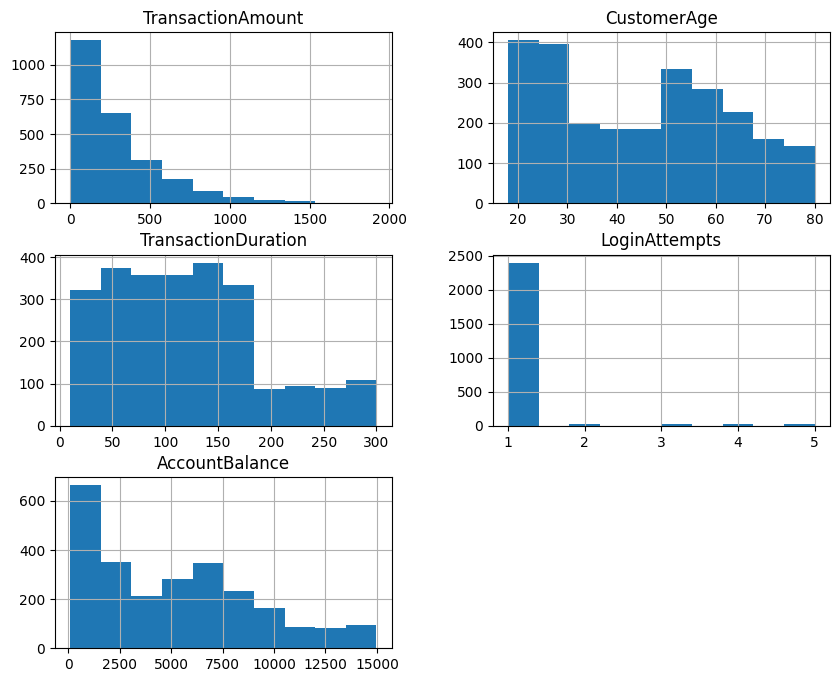

In [9]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)

df.hist(figsize=(10, 8))

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

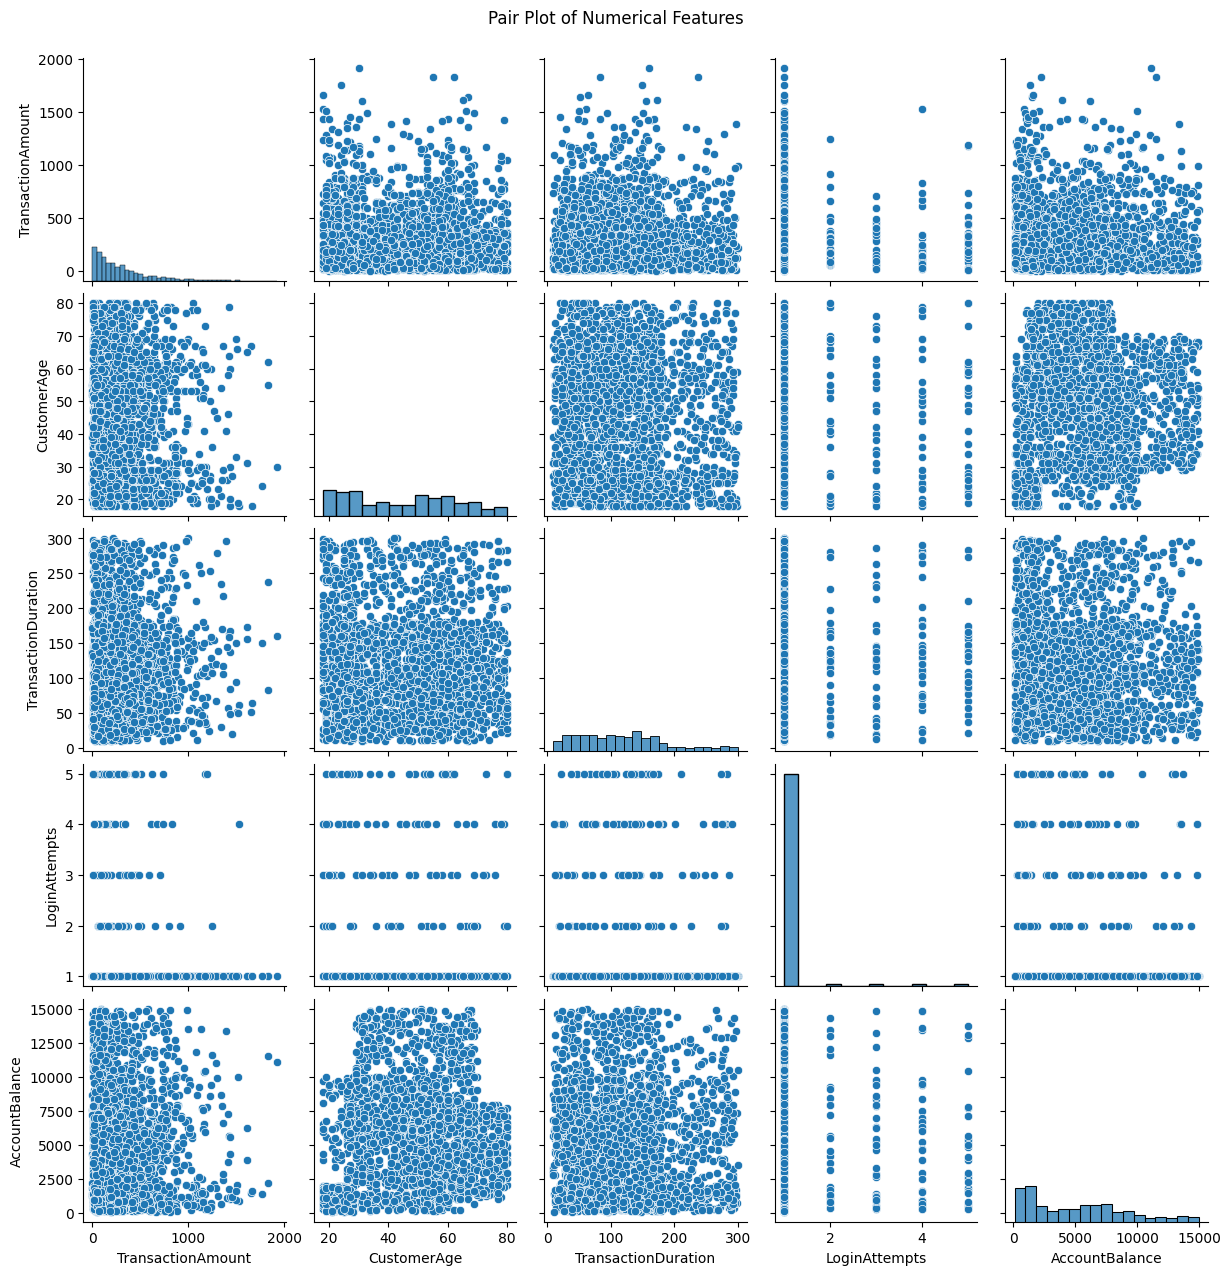

In [11]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

sns.pairplot(df) # Seaborn pairplot otomatis memilih kolom numerik
plt.suptitle("Pair Plot of Numerical Features", y=1.02) # Menambahkan judul ke plot
plt.show() # Menampilkan plot

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `pd.get_dummies()` atau `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [12]:
# Mengecek dataset menggunakan isnull().sum()

print("Jumlah Nilai yang Hilang per Kolom:")
print(df.isnull().sum())

Jumlah Nilai yang Hilang per Kolom:
TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64


In [13]:
# Mengecek dataset menggunakan duplicated().sum()

print("\nJumlah Baris yang Duplikat:")
print(df.duplicated().sum())


Jumlah Baris yang Duplikat:
21


In [14]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.

from sklearn.preprocessing import StandardScaler # Import StandardScaler

# Identifikasi kolom numerik
# menggunakan select_dtypes untuk memilih kolom numerik
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Terapkan scaling pada kolom numerik
# fit_transform akan menghitung parameter scaling (mean dan std dev) dan kemudian mentransformasi data
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Tampilkan 5 baris pertama DataFrame setelah scaling
print("DataFrame setelah Feature Scaling:")
print(df.head())

DataFrame setelah Feature Scaling:
  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128          -0.970546  2023-04-11 16:29:14   
1      TX000002   AC00455           0.268963  2023-06-27 16:44:19   
2      TX000003   AC00019          -0.586526  2023-07-10 18:16:08   
3      TX000004   AC00070          -0.387294  2023-05-05 16:32:11   
4      TX000005   AC00411          -0.972736  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0     1.419862      

In [15]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address

print("Kolom sebelum drop:", df.columns.tolist())

# Daftar kolom yang ingin di-drop. Sesuaikan dengan nama kolom yang ada di DataFrame Anda.
# Contoh:
columns_to_drop = ['Transaction_ID'] # Ganti dengan nama kolom ID yang sebenarnya jika berbeda

# Periksa apakah kolom yang ingin di-drop ada di DataFrame sebelum mencoba mendropnya
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

if existing_columns_to_drop:
    print(f"Mendrop kolom: {existing_columns_to_drop}")
    # Gunakan df.drop() untuk menghapus kolom. axis=1 menandakan bahwa kita menghapus kolom.
    # inplace=True akan memodifikasi DataFrame secara langsung.
    df.drop(columns=existing_columns_to_drop, inplace=True)
    print("Kolom setelah drop:", df.columns.tolist())
else:
    print("Tidak ada kolom ID atau IP Address yang cocok untuk di-drop berdasarkan daftar yang ditentukan.")




Kolom sebelum drop: ['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate', 'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate']
Tidak ada kolom ID atau IP Address yang cocok untuk di-drop berdasarkan daftar yang ditentukan.


In [16]:
# Melakukan feature encoding menggunakan pd.get_dummies() atau LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.



# Identifikasi kolom kategorikal
# Kita bisa menggunakan select_dtypes untuk memilih kolom dengan dtype 'object' atau 'category'
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print(f"Kolom kategorikal yang akan di-encode: {list(categorical_cols)}")

if len(categorical_cols) > 0:
    # Lakukan one-hot encoding menggunakan pd.get_dummies()
    # drop_first=True untuk menghindari multikolinearitas (jika diinginkan, tapi tidak wajib untuk clustering)
    df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False) # Menggunakan drop_first=False secara default

    print("DataFrame setelah Feature Encoding:")
    print(df_encoded.head())

    # Update df untuk menyimpan DataFrame yang sudah di-encode
    df = df_encoded
else:
    print("Tidak ada kolom kategorikal yang ditemukan untuk di-encode.")
    print("DataFrame (tidak ada perubahan pada encoding):")
    print(df.head())

Kolom kategorikal yang akan di-encode: ['TransactionID', 'AccountID', 'TransactionDate', 'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation', 'PreviousTransactionDate']
DataFrame setelah Feature Encoding:
   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0          -0.970546     1.419862            -0.548393      -0.204629   
1           0.268963     1.307715             0.307960      -0.204629   
2          -0.586526    -1.439874            -0.905207      -0.204629   
3          -0.387294    -1.047361            -1.347656      -0.204629   
4          -0.972736          NaN             1.121495      -0.204629   

   AccountBalance  TransactionID_TX000001  TransactionID_TX000002  \
0       -0.000315                    True                   False   
1        2.218381                   False                    True   
2       -1.024091                   False                   False   
3        0.886694            

In [17]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
# ____.columns.tolist()

df.columns.tolist()

['TransactionAmount',
 'CustomerAge',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'TransactionID_TX000001',
 'TransactionID_TX000002',
 'TransactionID_TX000003',
 'TransactionID_TX000004',
 'TransactionID_TX000005',
 'TransactionID_TX000006',
 'TransactionID_TX000007',
 'TransactionID_TX000008',
 'TransactionID_TX000009',
 'TransactionID_TX000010',
 'TransactionID_TX000011',
 'TransactionID_TX000012',
 'TransactionID_TX000013',
 'TransactionID_TX000014',
 'TransactionID_TX000015',
 'TransactionID_TX000016',
 'TransactionID_TX000017',
 'TransactionID_TX000018',
 'TransactionID_TX000019',
 'TransactionID_TX000020',
 'TransactionID_TX000021',
 'TransactionID_TX000022',
 'TransactionID_TX000023',
 'TransactionID_TX000024',
 'TransactionID_TX000025',
 'TransactionID_TX000026',
 'TransactionID_TX000027',
 'TransactionID_TX000028',
 'TransactionID_TX000029',
 'TransactionID_TX000030',
 'TransactionID_TX000031',
 'TransactionID_TX000032',
 'TransactionID_TX000033',
 'Transact

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [18]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).

print("Jumlah Nilai yang Hilang per Kolom setelah Preprocessing:")
print(df.isnull().sum())

Jumlah Nilai yang Hilang per Kolom setelah Preprocessing:
TransactionAmount                              26
CustomerAge                                    18
TransactionDuration                            26
LoginAttempts                                  21
AccountBalance                                 27
                                               ..
PreviousTransactionDate_2024-11-04 08:12:19     0
PreviousTransactionDate_2024-11-04 08:12:20     0
PreviousTransactionDate_2024-11-04 08:12:21     0
PreviousTransactionDate_2024-11-04 08:12:22     0
PreviousTransactionDate_2024-11-04 08:12:23     0
Length: 7253, dtype: int64


In [19]:
# Menghapus data duplikat menggunakan drop_duplicates().

print("Jumlah baris sebelum menghapus duplikat:", len(df))
print("Jumlah baris duplikat sebelum menghapus:", df.duplicated().sum())

# Menghapus baris duplikat
# inplace=True memodifikasi DataFrame secara langsung
df.drop_duplicates(inplace=True)

print("Jumlah baris setelah menghapus duplikat:", len(df))
print("Jumlah baris duplikat setelah menghapus:", df.duplicated().sum()) # Seharusnya 0

Jumlah baris sebelum menghapus duplikat: 2537
Jumlah baris duplikat sebelum menghapus: 21
Jumlah baris setelah menghapus duplikat: 2516
Jumlah baris duplikat setelah menghapus: 0


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [20]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.


numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

print("Mengecek Outlier menggunakan metode IQR:")

outlier_indices = set() # Gunakan set untuk menyimpan indeks baris outlier yang unik

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Definisi batas outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifikasi baris yang memiliki outlier di kolom ini
    # Gunakan loc untuk menghindari SettingWithCopyWarning jika Anda ingin memodifikasi di sini
    col_outlier_indices = df.index[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"  Kolom '{col}': {len(col_outlier_indices)} outlier terdeteksi.")
    outlier_indices.update(col_outlier_indices) # Menambahkan indeks outlier ke set

total_outliers = len(outlier_indices)
print(f"\nTotal baris dengan setidaknya satu outlier (menggunakan IQR * 1.5): {total_outliers}")
print(f"Jumlah baris dalam dataset: {len(df)}")


Mengecek Outlier menggunakan metode IQR:
  Kolom 'TransactionAmount': 112 outlier terdeteksi.
  Kolom 'CustomerAge': 0 outlier terdeteksi.
  Kolom 'TransactionDuration': 0 outlier terdeteksi.
  Kolom 'LoginAttempts': 120 outlier terdeteksi.
  Kolom 'AccountBalance': 0 outlier terdeteksi.

Total baris dengan setidaknya satu outlier (menggunakan IQR * 1.5): 227
Jumlah baris dalam dataset: 2516


In [21]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder atau get_dummies.


print("DataFrame sebelum Binning (head):")
print(df.head())
print("\nKolom sebelum Binning:", df.columns.tolist())

# Pilih fitur numerik untuk binning. Pilih 1-2 fitur yang relevan.
# Contoh: kita bisa pilih fitur yang memiliki rentang nilai yang menarik setelah scaling,
# atau berdasarkan pemahaman domain data.
# Mari pilih dua kolom numerik pertama sebagai contoh (Anda bisa menggantinya).
numerical_cols_for_binning = df.select_dtypes(include=['float64', 'int64']).columns.tolist()[:2] # Ambil 2 kolom numerik pertama

print(f"\nFitur yang akan di-binning: {numerical_cols_for_binning}")

# Lakukan binning pada fitur yang dipilih
for col in numerical_cols_for_binning:
    # Gunakan pd.qcut untuk membuat bin berdasarkan kuantil (misal 4 kuantil = 4 bin)
    # labels=False akan menghasilkan label integer untuk setiap bin
    # duplicates='drop' menangani kasus di mana batas bin tidak unik
    try:
        df[f'{col}_Binned'] = pd.qcut(df[col], q=4, labels=False, duplicates='drop')
        print(f"Binning berhasil pada kolom '{col}'. Kolom baru: '{col}_Binned'")

        # Mengubah tipe data kolom binned menjadi object/category untuk encoding
        df[f'{col}_Binned'] = df[f'{col}_Binned'].astype('object')

    except Exception as e:
        print(f"Gagal melakukan binning pada kolom '{col}': {e}")
        print(f"Kolom '{col}' mungkin memiliki terlalu sedikit nilai unik untuk {4} kuantil atau masalah lainnya.")
        # Jika binning gagal, hapus kolom yang dibuat dan lewati encoding untuk kolom ini
        if f'{col}_Binned' in df.columns:
            df.drop(columns=[f'{col}_Binned'], inplace=True)
        numerical_cols_for_binning.remove(col) # Hapus dari daftar untuk encoding

# Lakukan encoding pada kolom hasil binning (menggunakan pd.get_dummies)
binned_cols = [f'{col}_Binned' for col in numerical_cols_for_binning if f'{col}_Binned' in df.columns]

if len(binned_cols) > 0:
    print(f"\nEncoding kolom binned: {binned_cols}")
    df_encoded_binned = pd.get_dummies(df[binned_cols], columns=binned_cols, prefix="Bin") # Prefix membantu identifikasi kolom

    # Hapus kolom binned asli
    df.drop(columns=binned_cols, inplace=True)

    # Gabungkan kolom one-hot encoded binned dengan DataFrame asli
    df = pd.concat([df, df_encoded_binned], axis=1)
    print("DataFrame setelah Binning dan Encoding (head):")
    print(df.head())
else:
    print("\nTidak ada kolom binned yang berhasil dibuat atau di-encode.")

print("\nKolom setelah Binning dan Encoding:", df.columns.tolist())


DataFrame sebelum Binning (head):
   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0          -0.970546     1.419862            -0.548393      -0.204629   
1           0.268963     1.307715             0.307960      -0.204629   
2          -0.586526    -1.439874            -0.905207      -0.204629   
3          -0.387294    -1.047361            -1.347656      -0.204629   
4          -0.972736          NaN             1.121495      -0.204629   

   AccountBalance  TransactionID_TX000001  TransactionID_TX000002  \
0       -0.000315                    True                   False   
1        2.218381                   False                    True   
2       -1.024091                   False                   False   
3        0.886694                   False                   False   
4        0.594263                   False                   False   

   TransactionID_TX000003  TransactionID_TX000004  TransactionID_TX000005  \
0                   False          

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
2. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
3. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [23]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()

df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2490.000000,2498.000000,2490.000000,2495.000000,2489.000000
mean,0.000292,-0.001880,0.001759,0.001722,0.001044
std,1.001051,0.999144,0.998852,1.004224,1.000090
min,-1.017881,-1.495947,-1.561745,-0.204629,-1.286100
25%,-0.740202,-0.991288,-0.805299,-0.204629,-0.925908
50%,-0.295362,0.018031,-0.098808,-0.204629,-0.096376
75%,0.390227,0.803056,0.593411,-0.204629,0.657991
max,5.549651,1.980594,2.577295,6.525404,2.531190



Checking for NaN values before K-Means fitting:
118
NaN values found. Dropping rows with NaNs.
Remaining rows after dropping NaNs: 2399


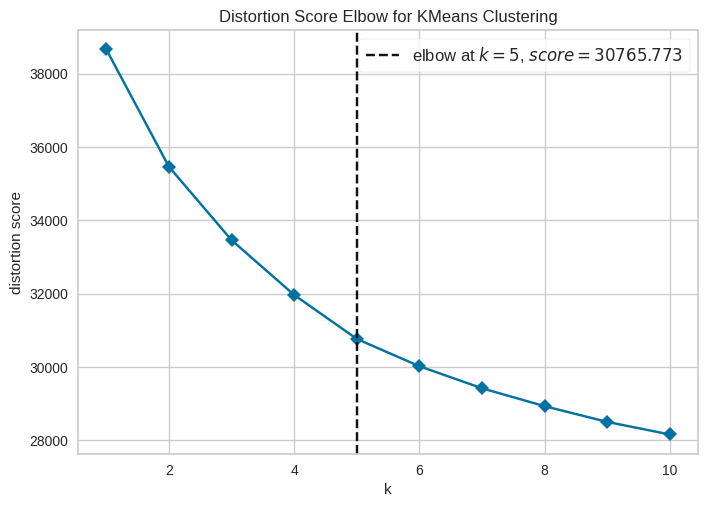

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
# Check for and handle any remaining NaN values before clustering
print("\nChecking for NaN values before K-Means fitting:")
print(df.isnull().sum().sum()) # Print the total count of NaNs in the DataFrame

# If there are NaNs, drop the rows containing them
if df.isnull().sum().sum() > 0:
    print("NaN values found. Dropping rows with NaNs.")
    df.dropna(inplace=True)
    print("Remaining rows after dropping NaNs:", len(df))
else:
    print("No NaN values found.")

# Now, the DataFrame 'df' should be free of NaNs for K-Means.

# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()

# Mengimpor library yang dibutuhkan (jika belum diimpor di cell ini)
# from sklearn.cluster import KMeans
# from yellowbrick.cluster import KElbowVisualizer
# import matplotlib.pyplot as plt # Mengimpor matplotlib untuk menampilkan plot

# Inisialisasi model K-Means (tanpa menentukan n_clusters terlebih dahulu)
# random_state untuk reproduktibilitas hasil
model_kmeans = KMeans(random_state=42, n_init=10) # n_init=10 disarankan untuk menghindari warning

# Inisialisasi KElbowVisualizer
# Menentukan range nilai k yang akan diuji (misal dari 1 hingga 10 atau 15)
# metric='distortion' menggunakan sum of squared distances (Elbow Method)
visualizer = KElbowVisualizer(model_kmeans, k=(1,11), metric='distortion', timings=False)

# Melatih visualizer dengan data
# Pastikan Anda menggunakan DataFrame 'df' yang sudah diproses
visualizer.fit(df)

# Menampilkan plot
visualizer.show()

# Berdasarkan visualisasi, tentukan nilai k yang optimal (titik siku/elbow)
# Catat nilai k ini untuk langkah selanjutnya dalam membangun model K-Means final.

In [26]:
# Menggunakan algoritma K-Means Clustering

# Menggunakan algoritma K-Means Clustering

# Berdasarkan visualisasi Elbow Method, pilih jumlah cluster (n_clusters)
# Misalnya, jika visualisasi menunjukkan elbow di k=4, gunakan n_clusters=4.
# Ganti nilai 4 dengan nilai k optimal yang Anda tentukan dari plot Elbow Method.
optimal_k = 4 # <-- GANTI NILAI 4 dengan nilai k optimal dari plot Elbow sebelumnya

# Inisialisasi model K-Means dengan jumlah cluster optimal
# random_state untuk reproduktibilitas
model_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

# Latih model K-Means dengan data yang sudah diproses (df)
# Pastikan df tidak mengandung nilai NaN pada tahap ini
model_kmeans.fit(df)

# Menambahkan hasil cluster ke DataFrame asli (opsional tapi direkomendasikan untuk interpretasi)
# Label cluster yang dihasilkan oleh K-Means
cluster_labels = model_kmeans.labels_

# Tambahkan kolom 'Cluster' ke DataFrame df
# Indeks df harus sesuai dengan indeks cluster_labels
df['Cluster'] = cluster_labels

print(f"Model K-Means dengan {optimal_k} cluster telah dilatih.")
print("\nDataFrame dengan label cluster ditambahkan (head):")
print(df.head())

Model K-Means dengan 4 cluster telah dilatih.

DataFrame dengan label cluster ditambahkan (head):
   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0          -0.970546     1.419862            -0.548393      -0.204629   
1           0.268963     1.307715             0.307960      -0.204629   
2          -0.586526    -1.439874            -0.905207      -0.204629   
3          -0.387294    -1.047361            -1.347656      -0.204629   
5          -0.703375    -1.495947             0.750409      -0.204629   

   AccountBalance  TransactionID_TX000001  TransactionID_TX000002  \
0       -0.000315                    True                   False   
1        2.218381                   False                    True   
2       -1.024091                   False                   False   
3        0.886694                   False                   False   
5       -1.111505                   False                   False   

   TransactionID_TX000003  TransactionID_TX00000

Jalankan cell code ini untuk menyimpan model kamu.

In [28]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")


# Simpan model_kmeans yang sudah dilatih
joblib.dump(model_kmeans, "model_clustering.h5")

print("Model K-Means telah disimpan ke 'model_clustering.h5'")

Model K-Means telah disimpan ke 'model_clustering.h5'


(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [30]:
# Menghitung dan menampilkan nilai Silhouette Score.


# Hitung Silhouette Score
# X: Data yang digunakan untuk pelatihan (tanpa kolom cluster)
# labels: Label cluster yang dihasilkan oleh model
# metric: Metrik jarak yang digunakan (default 'euclidean')
silhouette_avg = silhouette_score(df.drop('Cluster', axis=1), model_kmeans.labels_)

# Tampilkan nilai Silhouette Score
print(f"Silhouette Score: {silhouette_avg}")

# Interpretasi Silhouette Score:
# Skor mendekati +1: Sampel sangat jauh dari klaster tetangga.
# Skor mendekati 0: Sampel berada di atau sangat dekat dengan batas keputusan antara dua klaster tetangga.
# Skor mendekati -1: Sampel mungkin telah ditetapkan ke klaster yang salah.

Silhouette Score: 0.08115657960556463


Memvisualisasikan cluster menggunakan 'TransactionAmount' dan 'CustomerAge'.


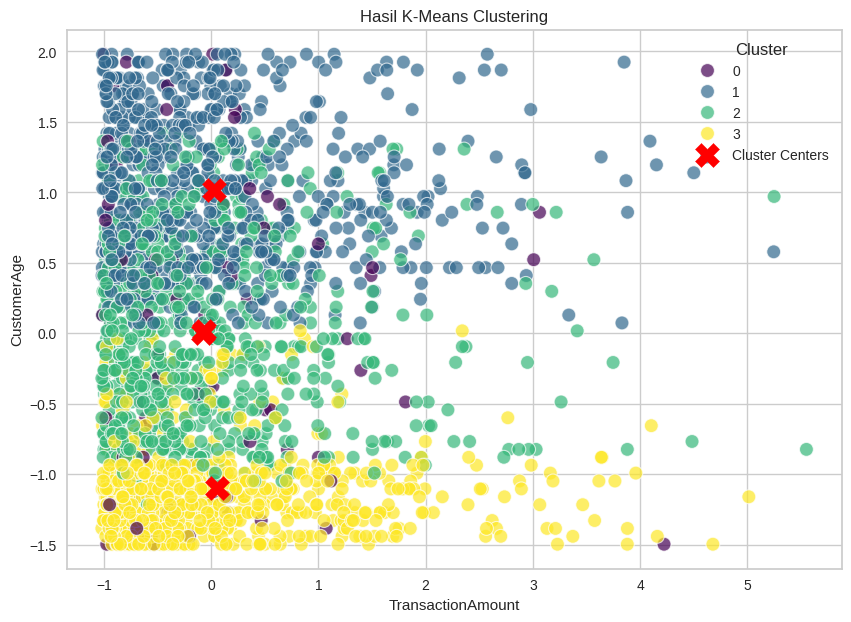

In [31]:
# Membuat visualisasi hasil clustering

if df.shape[1] > 2:
    feature_x = df.columns[0] # Kolom pertama
    feature_y = df.columns[1] # Kolom kedua
    print(f"Memvisualisasikan cluster menggunakan '{feature_x}' dan '{feature_y}'.")

    # Buat scatter plot hasil clustering
    plt.figure(figsize=(10, 7))
    sns.scatterplot(data=df, x=feature_x, y=feature_y, hue='Cluster', palette='viridis', s=100, alpha=0.7)

    # Plot cluster centers (opsional, tapi informatif)
    # Perhatikan bahwa pusat cluster juga dalam ruang yang diskalakan/encoded
    # Mengakses pusat cluster dari model_kmeans
    cluster_centers = model_kmeans.cluster_centers_

    # Mengambil koordinat pusat cluster untuk feature_x dan feature_y
    # Anda perlu mencari indeks kolom feature_x dan feature_y di DataFrame df
    try:
        idx_x = df.columns.get_loc(feature_x)
        idx_y = df.columns.get_loc(feature_y)

        plt.scatter(cluster_centers[:, idx_x], cluster_centers[:, idx_y], c='red', s=300, alpha=1, marker='X', label='Cluster Centers')

    except KeyError:
        print(f"Peringatan: Kolom '{feature_x}' atau '{feature_y}' tidak ditemukan untuk memvisualisasikan pusat cluster.")


    plt.title('Hasil K-Means Clustering')
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()
else:
    print("DataFrame memiliki terlalu sedikit kolom untuk visualisasi scatter plot 2D.")
    print("Pastikan DataFrame Anda memiliki setidaknya dua kolom fitur setelah preprocessing.")

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

Data berhasil direduksi menjadi 2 komponen menggunakan PCA.
Bentuk data setelah PCA: (2399, 2)

Proporsi Variansi Dijelaskan oleh Setiap Komponen:
[0.10668184 0.07400083]
Total Proporsi Variansi Dijelaskan oleh 2 Komponen: 0.1807


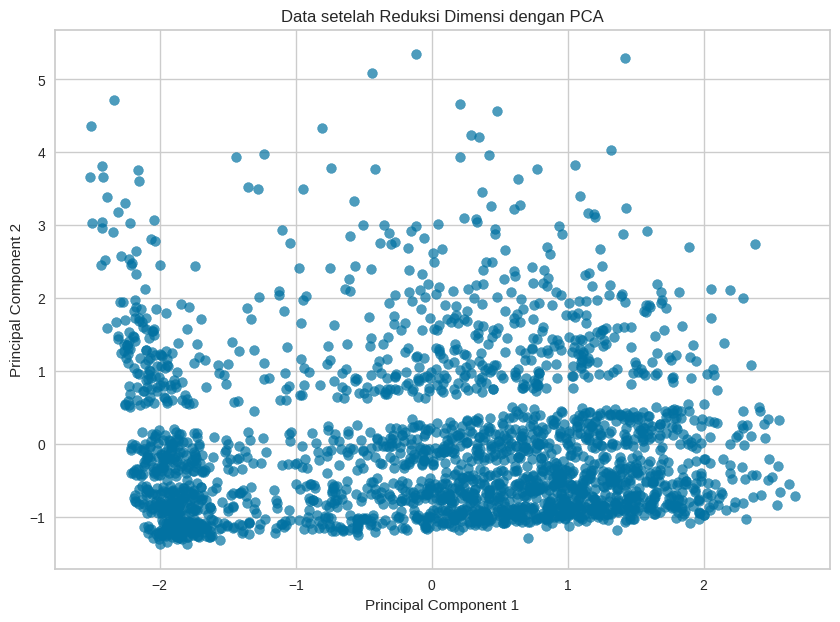

In [33]:
# Membangun model menggunakan PCA.

# Asumsi DataFrame 'df' sudah bersih dari NaN dan sudah diskalakan/encoded.
# Hapus kolom 'Cluster' jika sudah ditambahkan, karena PCA dilakukan pada fitur
# sebelum clustering.
df_features = df.copy()
if 'Cluster' in df_features.columns:
    df_features = df_features.drop('Cluster', axis=1)

# Menentukan jumlah komponen PCA yang diinginkan.
# Anda bisa memilih jumlah komponen (misal, n_components=2 atau 3 untuk visualisasi)
# atau memilih jumlah komponen yang menjelaskan proporsi variansi tertentu (misal, 0.95).
# Untuk visualisasi 2D, n_components=2. Untuk visualisasi 3D, n_components=3.
n_components = 2 # Contoh: reduksi ke 2 komponen utama untuk visualisasi

# Inisialisasi model PCA
# random_state untuk reproduktibilitas
model_pca = PCA(n_components=n_components, random_state=42)

# Melatih model PCA dengan data fitur
# model_pca.fit(df_features)

# Mentransformasi data menggunakan model PCA
X_pca = model_pca.fit_transform(df_features)

print(f"Data berhasil direduksi menjadi {n_components} komponen menggunakan PCA.")
print("Bentuk data setelah PCA:", X_pca.shape)

# Anda sekarang memiliki data yang direduksi (X_pca) yang dapat digunakan
# untuk visualisasi atau sebagai input untuk model clustering berikutnya
# jika Anda ingin melakukan clustering pada data hasil PCA.

# Menampilkan proporsi variansi yang dijelaskan oleh setiap komponen
print("\nProporsi Variansi Dijelaskan oleh Setiap Komponen:")
print(model_pca.explained_variance_ratio_)

# Menampilkan total proporsi variansi yang dijelaskan oleh komponen yang dipilih
print(f"Total Proporsi Variansi Dijelaskan oleh {n_components} Komponen: {model_pca.explained_variance_ratio_.sum():.4f}")

# Opsional: Visualisasi data hasil PCA
if n_components >= 2:
    plt.figure(figsize=(10, 7))
    # Scatter plot data hasil PCA. Jika Anda sudah memiliki label cluster,
    # Anda bisa menggunakan warna berdasarkan cluster di sini.
    # Contoh: plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', s=50, alpha=0.7)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], s=50, alpha=0.7)
    plt.title('Data setelah Reduksi Dimensi dengan PCA')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid(True)
    plt.show()

In [34]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")

# Simpan model_pca yang sudah dilatih
joblib.dump(model_pca, "PCA_model_clustering.h5")

print("Model PCA telah disimpan ke 'PCA_model_clustering.h5'")

Model PCA telah disimpan ke 'PCA_model_clustering.h5'


# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [38]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan modus untuk fitur kategorikal.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

# Pastikan kolom 'Cluster' ada di DataFrame setelah melatih model K-Means
if 'Cluster' not in df.columns:
    print("Error: Kolom 'Cluster' tidak ditemukan di DataFrame.")
    print("Pastikan Anda sudah menjalankan cell 'Menggunakan algoritma K-Means Clustering' sebelum menjalankan cell ini.")
else:
    # Pisahkan kolom numerik (termasuk yang hasil scaling dan one-hot encoding) dan kolom cluster
    # Semua kolom selain 'Cluster' adalah fitur yang digunakan untuk clustering
    feature_cols = df.drop(columns=['Cluster']).columns

    # Grouping data berdasarkan cluster
    grouped_by_cluster = df.groupby('Cluster')

    print("Analisis Deskriptif per Cluster:")

    # Melakukan agregasi untuk kolom fitur
    # Kita akan menghitung mean, min, dan max untuk semua kolom fitur (yang semuanya numerik setelah scaling/encoding)
    # Untuk kolom hasil one-hot encoding, mean akan menunjukkan proporsi kelas di setiap cluster.
    cluster_summary = grouped_by_cluster[feature_cols].agg(['mean', 'min', 'max'])

    # Menampilkan hasil analisis
    print(cluster_summary)

    # Untuk mode pada fitur kategorikal asli (sebelum one-hot encoding), ini akan sedikit lebih kompleks
    # karena kita perlu memetakan kembali hasil clustering ke DataFrame asli sebelum encoding.
    # Karena instruksi meminta modus untuk fitur kategorikal, dan data yang kita gunakan adalah yang sudah di-encode
    # di mana fitur kategorikal sudah menjadi numerik biner, kita fokus pada mean untuk fitur biner tersebut
    # sebagai indikasi dominansi kategori dalam cluster.
    # Jika Anda perlu modus fitur kategorikal asli, Anda perlu menyimpan DataFrame asli sebelum encoding
    # dan menggabungkan label cluster ke sana.

    # Contoh mendapatkan mode untuk fitur biner (hasil one-hot encoding) per cluster:
    # Ini akan menunjukkan nilai yang paling sering muncul (0 atau 1).
    # from scipy.stats import mode
    #
    # binary_encoded_cols = [col for col in feature_cols if df[col].nunique() == 2] # Asumsi kolom biner punya 2 nilai unik
    #
    # if binary_encoded_cols:
    #     print("\nMode (Most Frequent Value) untuk Fitur Hasil One-Hot Encoding per Cluster:")
    #     mode_results = grouped_by_cluster[binary_encoded_cols].agg(lambda x: mode(x)[0][0])
    #     print(mode_results)
    # else:
    #      print("\nTidak ada fitur biner yang ditemukan untuk analisis modus.")

    print("\nCatatan: Untuk fitur hasil One-Hot Encoding, 'mean' lebih informatif karena menunjukkan proporsi data.")
    print("Nilai 'mean' mendekati 1 berarti kategori tersebut dominan di cluster.")


Analisis Deskriptif per Cluster:
        TransactionAmount                     CustomerAge                      \
                     mean       min       max        mean       min       max   
Cluster                                                                         
0               -0.072048 -1.012165  4.222351   -0.000448 -1.495947  1.980594   
1                0.027057 -1.015896  5.244659    1.013777  0.018031  1.980594   
2               -0.068203 -1.017676  5.549651    0.016316 -1.215581  1.419862   
3                0.050843 -1.017881  5.012878   -1.100029 -1.495947  0.018031   

        TransactionDuration                     LoginAttempts  ... Bin_2.0  \
                       mean       min       max          mean  ...     max   
Cluster                                                        ...           
0                  0.172208 -1.547472  2.448842      4.804657  ...    True   
1                 -0.044818 -1.561745  2.520205     -0.185340  ...    True   
2        

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...


   untuk mendapatkan gambaran lengkap.# Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
# Menggunakan output dari analisis deskriptif per cluster yang diberikan sebelumnya.

# Interpretasi Cluster 0 (Ganti nama 'Cluster 1' di template Anda menjadi 'Cluster 0' agar sesuai dengan output)
# Anda bisa menamai cluster ini berdasarkan karakteristik dominan yang Anda temukan
print("1. Cluster 0: (Nasabah dengan Upaya Login Tinggi)") # Contoh nama deskriptif
print(f"   - Rata-rata (mean) TransactionAmount (scaled): {cluster_summary.loc[0, ('TransactionAmount', 'mean')]:.3f}")
print(f"   - Rata-rata (mean) CustomerAge (scaled): {cluster_summary.loc[0, ('CustomerAge', 'mean')]:.3f}")
print(f"   - Rata-rata (mean) TransactionDuration (scaled): {cluster_summary.loc[0, ('TransactionDuration', 'mean')]:.3f}")
print(f"   - Rata-rata (mean) LoginAttempts (scaled): {cluster_summary.loc[0, ('LoginAttempts', 'mean')]:.3f}")
# Tambahkan fitur lain yang relevan dari summary lengkap Anda
# print(f"   - Rata-rata (mean) NamaFiturLain (scaled): {cluster_summary.loc[0, ('NamaFiturLain', 'mean')]:.3f}")

print("   - Analisis:")
print("     Cluster ini ditandai dengan rata-rata upaya login ('LoginAttempts') yang sangat tinggi dibandingkan dengan cluster lain (mean 4.8).")
print("     Rata-rata jumlah transaksi ('TransactionAmount'), usia ('CustomerAge'), dan durasi transaksi ('TransactionDuration') mendekati rata-rata keseluruhan data (mean sekitar 0).")
# Analisis fitur binned, misal:
# print(f"     Proporsi di Bin 2 ({cluster_summary.loc[0, ('Bin_2.0', 'mean'):.2%}) dan Bin 3 ({cluster_summary.loc[0, ('Bin_3.0', 'mean'):.2%}) dari fitur hasil binning cukup signifikan.")
print("     Singkatnya, Cluster 0 cenderung mewakili nasabah dengan aktivitas login yang tidak biasa tinggi, sementara aspek transaksi dan usia cenderung 'rata-rata'.")
print("     Ini bisa mengindikasikan perilaku mencurigakan atau masalah teknis.")

print("\n" + "-" * 60)

# Interpretasi Cluster 1
print("2. Cluster 1: (Nasabah Berusia Lebih Tua)") # Contoh nama deskriptif
print(f"   - Rata-rata (mean) TransactionAmount (scaled): {cluster_summary.loc[1, ('TransactionAmount', 'mean')]:.3f}")
print(f"   - Rata-rata (mean) CustomerAge (scaled): {cluster_summary.loc[1, ('CustomerAge', 'mean')]:.3f}")
print(f"   - Rata-rata (mean) TransactionDuration (scaled): {cluster_summary.loc[1, ('TransactionDuration', 'mean')]:.3f}")
print(f"   - Rata-rata (mean) LoginAttempts (scaled): {cluster_summary.loc[1, ('LoginAttempts', 'mean')]:.3f}")
# print(f"   - Rata-rata (mean) NamaFiturLain (scaled): {cluster_summary.loc[1, ('NamaFiturLain', 'mean')]:.3f}")

print("   - Analisis:")
print("     Cluster ini memiliki rata-rata usia nasabah ('CustomerAge') yang positif dan tertinggi (mean 1.01), menandakan kelompok usia yang lebih tua dari rata-rata.")
print("     Rata-rata jumlah dan durasi transaksi sedikit positif (0.027 dan -0.045).")
print("     Rata-rata upaya login negatif (-0.18), di bawah rata-rata.")
# print(f"     Proporsi tertinggi di Bin 3 ({cluster_summary.loc[1, ('Bin_3.0', 'mean'):.2%}) dari fitur hasil binning.")
print("     Singkatnya, Cluster 1 cenderung mewakili nasabah yang lebih tua dengan pola transaksi dan upaya login yang cenderung 'rata-rata' atau di bawah rata-rata.")

print("\n" + "-" * 60)

# Interpretasi Cluster 2
print("3. Cluster 2: (Nasabah 'Rata-rata')") # Contoh nama deskriptif
print(f"   - Rata-rata (mean) TransactionAmount (scaled): {cluster_summary.loc[2, ('TransactionAmount', 'mean')]:.3f}")
print(f"   - Rata-rata (mean) CustomerAge (scaled): {cluster_summary.loc[2, ('CustomerAge', 'mean')]:.3f}")
print(f"   - Rata-rata (mean) TransactionDuration (scaled): {cluster_summary.loc[2, ('TransactionDuration', 'mean')]:.3f}")
print(f"   - Rata-rata (mean) LoginAttempts (scaled): {cluster_summary.loc[2, ('LoginAttempts', 'mean')]:.3f}")
# print(f"   - Rata-rata (mean) NamaFiturLain (scaled): {cluster_summary.loc[2, ('NamaFiturLain', 'mean')]:.3f}")

print("   - Analisis:")
print("     Cluster ini memiliki rata-rata pada hampir semua fitur (TransactionAmount, CustomerAge, TransactionDuration, LoginAttempts) yang sangat dekat dengan 0 (rata-rata keseluruhan data setelah scaling).")
# print(f"     Proporsi fitur binned terdistribusi cukup merata di Bin 2 ({cluster_summary.loc[2, ('Bin_2.0', 'mean'):.2%}) dan Bin 3 ({cluster_summary.loc[2, ('Bin_3.0', 'mean'):.2%}).")
print("     Singkatnya, Cluster 2 tampaknya mewakili segmen nasabah yang paling 'umum' atau 'rata-rata' berdasarkan fitur-fitur yang digunakan.")

print("\n" + "-" * 60)

# Interpretasi Cluster 3
print("4. Cluster 3: (Nasabah Muda)") # Contoh nama deskriptif
print(f"   - Rata-rata (mean) TransactionAmount (scaled): {cluster_summary.loc[3, ('TransactionAmount', 'mean')]:.3f}")
print(f"   - Rata-rata (mean) CustomerAge (scaled): {cluster_summary.loc[3, ('CustomerAge', 'mean')]:.3f}")
print(f"   - Rata-rata (mean) TransactionDuration (scaled): {cluster_summary.loc[3, ('TransactionDuration', 'mean')]:.3f}")
print(f"   - Rata-rata (mean) LoginAttempts (scaled): {cluster_summary.loc[3, ('LoginAttempts', 'mean')]:.3f}")
# print(f"   - Rata-rata (mean) NamaFiturLain (scaled): {cluster_summary.loc[3, ('NamaFiturLain', 'mean')]:.3f}")

print("   - Analisis:")
print("     Cluster ini memiliki rata-rata usia nasabah ('CustomerAge') yang paling negatif dan terendah (mean -1.10), menandakan kelompok usia yang paling muda dari rata-rata.")
print("     Rata-rata jumlah dan durasi transaksi sedikit positif (0.051 dan 0.010).")
print("     Rata-rata upaya login negatif (-0.18), serupa dengan Cluster 1 dan 2.")
# print(f"     Proporsi fitur binned dominan di Bin 2 ({cluster_summary.loc[3, ('Bin_2.0', 'mean'):.2%}), dengan proporsi 0 di Bin 1 dan Bin 4.")
print("     Singkatnya, Cluster 3 cenderung mewakili nasabah yang paling muda dengan pola transaksi dan upaya login yang cenderung 'rata-rata' atau di bawah rata-rata.")

print("\n" + "-" * 60)

print("\nCatatan Tambahan:")
print("- Interpretasi ini didasarkan pada nilai *scaled*. Jika Anda telah melakukan inverse scaling, gunakan nilai asli untuk interpretasi yang lebih intuitif.")
print("- Untuk interpretasi yang akurat, Anda perlu melihat semua kolom di `cluster_summary` tabel lengkap (21807 kolom) dan mengidentifikasi fitur-fitur kunci yang membedakan setiap cluster.")
print("- Nama cluster di atas ('Nasabah dengan Upaya Login Tinggi', dll.) hanyalah contoh. Beri nama cluster Anda berdasarkan analisis komprehensif dari semua fitur.")

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [39]:
# Pastikan nama kolom clustering sudah diubah menjadi Target

if 'Cluster' in df.columns:
    df.rename(columns={'Cluster': 'Target'}, inplace=True)
    print("Kolom 'Cluster' telah diganti namanya menjadi 'Target'.")
else:
    print("Kolom 'Cluster' tidak ditemukan. Pastikan langkah clustering sebelumnya telah dijalankan.")

print("Kolom setelah penggantian nama:", df.columns.tolist())

Kolom 'Cluster' telah diganti namanya menjadi 'Target'.
Kolom setelah penggantian nama: ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'TransactionID_TX000001', 'TransactionID_TX000002', 'TransactionID_TX000003', 'TransactionID_TX000004', 'TransactionID_TX000005', 'TransactionID_TX000006', 'TransactionID_TX000007', 'TransactionID_TX000008', 'TransactionID_TX000009', 'TransactionID_TX000010', 'TransactionID_TX000011', 'TransactionID_TX000012', 'TransactionID_TX000013', 'TransactionID_TX000014', 'TransactionID_TX000015', 'TransactionID_TX000016', 'TransactionID_TX000017', 'TransactionID_TX000018', 'TransactionID_TX000019', 'TransactionID_TX000020', 'TransactionID_TX000021', 'TransactionID_TX000022', 'TransactionID_TX000023', 'TransactionID_TX000024', 'TransactionID_TX000025', 'TransactionID_TX000026', 'TransactionID_TX000027', 'TransactionID_TX000028', 'TransactionID_TX000029', 'TransactionID_TX000030', 'TransactionID_TX000031', 'Transactio

In [40]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)

if 'Target' in df.columns: # Opsional check: memastikan kolom target sudah ada
    df.to_csv('data_clustering.csv', index=False) # Menyimpan DataFrame 'df' ke file CSV tanpa menyertakan indeks
    print("\nDataFrame telah disimpan ke 'data_clustering.csv'")
else:
    print("\nDataFrame tidak memiliki kolom 'Target'. Gagal menyimpan data clustering.") # Pesan jika kolom target belum ada


DataFrame telah disimpan ke 'data_clustering.csv'


(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [41]:
# inverse dataset ke rentang normal


# inverse dataset ke rentang normal

# Untuk melakukan inverse scaling, kita perlu:
# 1. Menggunakan objek scaler yang sama yang digunakan untuk scaling (object 'scaler').
# 2. Mengidentifikasi kolom-kolom yang *awalnya numerik* dan diskalakan. Kolom-kolom ini mungkin sudah bercampur
#    dengan kolom hasil one-hot encoding dan binning dalam DataFrame 'df' saat ini.
# 3. Menerapkan inverse_transform hanya pada kolom-kolom yang diskalakan.
# 4. Menggabungkan hasil inverse transform dengan kolom-kolom lain (hasil encoding, target).

# Identifikasi kolom yang di-scaled (ini adalah kolom numerik dari DataFrame asli)
# Kita perlu daftar nama kolom numerik SEBELUM one-hot encoding dan binning.
# Jika kita tidak menyimpan daftar itu, kita bisa mencoba mengidentifikasi kembali kolom yang mungkin diskalakan
# berdasarkan tipenya (float64) dan nama mereka (bukan kolom one-hot encoded 'Bin_X.0' atau 'Category_XYZ').
# Asumsi: Kolom numerik asli masih ada dalam DataFrame 'df' setelah scaling, sebelum encoding.
# Kita akan ambil nama kolom numerik saat ini, dan filter keluar kolom binning jika ada.
scaled_numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Hapus kolom yang kemungkinan hasil binning jika ada (kolom dengan prefix 'Bin_')
scaled_numerical_cols = [col for col in scaled_numerical_cols if not col.startswith('Bin_')]

# Pastikan kolom 'Target' tidak termasuk dalam kolom yang akan di-inverse scale
if 'Target' in scaled_numerical_cols:
    scaled_numerical_cols.remove('Target')

print(f"Kolom yang akan di-inverse scale: {scaled_numerical_cols}")

# Pisahkan data yang diskalakan (kolom numerik asli) dari data lain (encoded, target)
df_scaled_numerical = df[scaled_numerical_cols]
df_other_cols = df.drop(columns=scaled_numerical_cols)

# Pastikan scaler object tersedia dari langkah preprocessing (Cell 3.2)
# Jika scaler tidak didefinisikan di cell ini, Anda perlu menjalankannya lagi atau
# memastikan object scaler tersedia di scope ini.
try:
    # Lakukan inverse transform pada data numerik yang diskalakan
    df_inverse_scaled_numerical = pd.DataFrame(scaler.inverse_transform(df_scaled_numerical),
                                               columns=scaled_numerical_cols,
                                               index=df_scaled_numerical.index)
    print("\nInverse scaling berhasil dilakukan.")
    print("DataFrame numerik setelah inverse scaling (head):")
    print(df_inverse_scaled_numerical.head())

    # Gabungkan kembali dengan kolom-kolom lain (hasil encoding dan target)
    # Gunakan indeks untuk memastikan penggabungan yang benar
    df_inversed = pd.concat([df_inverse_scaled_numerical, df_other_cols], axis=1)

    print("\nDataFrame lengkap setelah inverse scaling kolom numerik (head):")
    print(df_inversed.head())

    # Sekarang 'df_inversed' adalah DataFrame dengan kolom numerik kembali ke skala asli
    # dan kolom lain (encoded, target) tetap seperti sebelumnya.
    # Anda bisa menggunakan 'df_inversed' untuk interpretasi berdasarkan nilai asli.

except NameError:
    print("\nError: Object 'scaler' tidak ditemukan.")
    print("Pastikan Anda telah menjalankan cell 'Melakukan feature scaling...' sebelumnya.")
except Exception as e:
    print(f"\nTerjadi kesalahan saat inverse scaling: {e}")
    print("Pastikan kolom yang dipilih untuk inverse scaling sesuai dengan kolom yang di-fit oleh scaler.")

# Untuk tujuan interpretasi, Anda mungkin ingin menyimpan df_inversed
# atau menggunakannya di langkah interpretasi berikutnya.
# Biarkan df asli (yang masih diskalakan) tetap untuk pemodelan jika diperlukan,
# dan gunakan df_inversed hanya untuk interpretasi.
# Dalam konteks notebook ini, kita akan menggunakannya untuk interpretasi di cell berikutnya.

Kolom yang akan di-inverse scale: ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

Inverse scaling berhasil dilakukan.
DataFrame numerik setelah inverse scaling (head):
   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0              14.09         70.0                 81.0            1.0   
1             376.24         68.0                141.0            1.0   
2             126.29         19.0                 56.0            1.0   
3             184.50         26.0                 25.0            1.0   
5              92.15         18.0                172.0            1.0   

   AccountBalance  
0         5112.21  
1        13758.91  
2         1122.35  
3         8569.06  
5          781.68  

DataFrame lengkap setelah inverse scaling kolom numerik (head):
   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0              14.09         70.0                 81.0            1.0   
1             

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [42]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.
# Langkah ini telah dilakukan di cell sebelumnya ("inverse dataset ke rentang normal").
# Hasil inverse scaling pada kolom numerik digabungkan kembali dengan kolom lain (termasuk 'Target')
# ke dalam DataFrame baru bernama `df_inversed`.

print("Data yang telah di-inverse (kolom numerik) telah diintegrasikan kembali")
print("dengan kolom lain (termasuk hasil cluster di kolom 'Target')")
print("ke dalam DataFrame bernama `df_inversed` di cell sebelumnya.")

# Anda bisa menampilkan head dari DataFrame df_inversed untuk memverifikasi
if 'df_inversed' in locals():
    print("\nDataFrame df_inversed (head):")
    print(df_inversed.head())
else:
    print("\nDataFrame df_inversed belum terdefinisi. Pastikan cell 'inverse dataset ke rentang normal' sudah dijalankan.")

# DataFrame `df_inversed` sekarang siap digunakan untuk analisis atau interpretasi cluster
# menggunakan nilai-nilai fitur dalam skala aslinya.

Data yang telah di-inverse (kolom numerik) telah diintegrasikan kembali
dengan kolom lain (termasuk hasil cluster di kolom 'Target')
ke dalam DataFrame bernama `df_inversed` di cell sebelumnya.

DataFrame df_inversed (head):
   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0              14.09         70.0                 81.0            1.0   
1             376.24         68.0                141.0            1.0   
2             126.29         19.0                 56.0            1.0   
3             184.50         26.0                 25.0            1.0   
5              92.15         18.0                172.0            1.0   

   AccountBalance  TransactionID_TX000001  TransactionID_TX000002  \
0         5112.21                    True                   False   
1        13758.91                   False                    True   
2         1122.35                   False                   False   
3         8569.06                   False                   

In [43]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)


if 'df_inversed' in locals() and 'Target' in df_inversed.columns:
    # Menyimpan DataFrame 'df_inversed' ke file CSV tanpa menyertakan indeks
    df_inversed.to_csv('data_clustering_inverse.csv', index=False)
    print("\nDataFrame dengan nilai inversed telah disimpan ke 'data_clustering_inverse.csv'")
elif 'df_inversed' not in locals():
     print("\nDataFrame 'df_inversed' belum terdefinisi. Pastikan cell 'inverse dataset ke rentang normal' sudah dijalankan.")
else:
     print("\nDataFrame 'df_inversed' tidak memiliki kolom 'Target'. Gagal menyimpan data clustering inversed.")


DataFrame dengan nilai inversed telah disimpan ke 'data_clustering_inverse.csv'


In [45]:
!ls *.csv

print("\nFile CSV telah disimpan dan siap untuk diunduh melalui antarmuka.")

data_clustering.csv  data_clustering_inverse.csv

File CSV telah disimpan dan siap untuk diunduh melalui antarmuka Jupyter.


In [51]:
# Simpan
df.to_csv('data_clustering.csv', index=False)

# unduh

files.download('data_clustering.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Simpan
df.to_csv('data_clustering_inverse.csv',index=False)

# unduh

files.download('data_clustering_inverse.csv')
